In [1]:
from modsim import *


In [2]:
bikeshare = State(makati = 9, manila = 3)

In [3]:
bikeshare

makati    9
manila    3
Name: state, dtype: int64

In [4]:
print(bikeshare.makati)

9


In [5]:
def bike_to_makati():
    print("Moving to Makati")
    bikeshare.makati += 1
    bikeshare.manila -= 1

In [6]:
def bike_to_manila():
    print("Moving to Manila")
    bikeshare.makati -= 1
    bikeshare.manila += 1

In [7]:
bike_to_makati()
bikeshare

Moving to Makati


makati    10
manila     2
Name: state, dtype: int64

In [8]:
if flip(0.7):
    print("heads")
else:
    print("tails")

heads


In [9]:
bikeshare = State(makati = 9, manila = 3)
def step(p1, p2):
    if flip(p1):
        bike_to_makati()
    elif flip(p2):
        bike_to_manila()
    else:
        print("no movement")
        

In [10]:
step(0.30, 0.20)
bikeshare

no movement


makati    9
manila    3
Name: state, dtype: int64

In [11]:
bikeshare = State(makati = 9, manila = 3)
def step(p1, p2):
    if flip(p1):
        bike_to_makati()
    elif flip(p2):
        bike_to_manila()
    else:
        print("no movement")
        

    

In [12]:
results = TimeSeries()
for i in range(10):
    step(0.75, 0.6)
    results[i] = bikeshare.makati

no movement
Moving to Makati
Moving to Makati
Moving to Manila
Moving to Makati
Moving to Makati
Moving to Makati
Moving to Manila
Moving to Makati
Moving to Makati


In [13]:
results

Time
0     9
1    10
2    11
3    10
4    11
5    12
6    13
7    12
8    13
9    14
Name: Quantity, dtype: int64

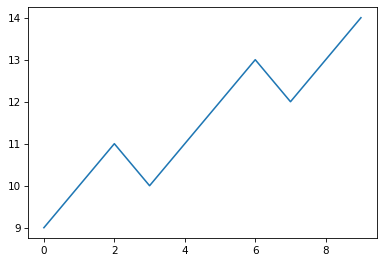

In [14]:
plt.plot(results)

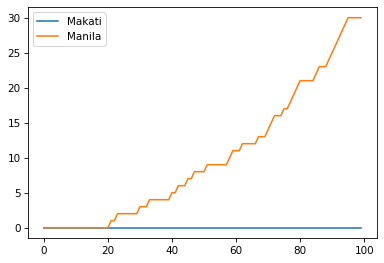

In [15]:
from modsim import *
import random
def bike_to_makati(state):
#     print("Moving to Makati")
    if state.manila == 0:
        state.manila_empty += 1
        return
    bikeshare.makati += 1
    bikeshare.manila -= 1


def bike_to_manila(state):
#     print("Moving to Manila")
    if state.makati == 0:
        state.makati_empty += 1
        return
    bikeshare.makati -= 1
    bikeshare.manila += 1


def step(state, p1, p2):
    if flip(p1):
        bike_to_makati(state)
    elif flip(p2):
        bike_to_manila(state)



def run_simulation(state, p1, p2, num_steps):
    makati_results = TimeSeries()
    manila_results = TimeSeries()
    for i in range(num_steps):
        step(state, p1, p2)
        makati_results[i] = bikeshare.makati
        manila_results[i] = bikeshare.manila
    plt.plot(makati_results, label = "Makati")
    plt.plot(manila_results, label = "Manila")
    plt.legend()

def runsimulation2(state, p1,p2, num_steps):
    makati_empty = TimeSeries()
    manila_empty = TimeSeries()
    for i in range(num_steps):
        step(state, p1, p2)
        makati_empty[i] = bikeshare.makati_empty
        manila_empty[i] = bikeshare.manila_empty
    plt.plot(makati_empty, label = "Makati")
    plt.plot(manila_empty, label = "Manila")
    plt.legend()

bikeshare = State(makati = 3, manila = 3, makati_empty = 0, manila_empty = 0)
runsimulation2(bikeshare, 0.50, 0.50, 100)